# Who Does It Better Apple or  Android

Mobile gaming is becoming a big market for companies to expand, apple was cited to be one of the biggest game publishers in the world by volume of sales. We aim to see who runs a more successful applications store by, total sales, free vs. paid, user rating, categories, and downloads.


In [106]:
%matplotlib notebook

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
google_data = pd.read_csv("Resources/googleplaystore.csv")
apple_data = pd.read_csv("Resources/AppleStore.csv")

In [109]:
google = google_data[["App","Category","Rating","Reviews","Size","Type","Price","Genres"]]

google["Size"] = google["Size"].replace({"M":""}, regex=True)
google["Price"] = google["Price"].replace({"\$":""}, regex=True)
google = google.drop(10472)
google["Price"] = pd.to_numeric(google["Price"]).map("{:.1f}".format)
google = google.rename(columns={"Size":"Size (M)"})
google["Category"] = google["Category"].str.title()
google["Category"] = google["Category"].replace({"_And_":" & ","_":" "},regex=True)
google = google.reset_index(drop=True)
google.head()

/Users/YoYoYe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/YoYoYe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,App,Category,Rating,Reviews,Size (M),Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design,4.1,159,19,Free,0.0,Art & Design
1,Coloring book moana,Art & Design,3.9,967,14,Free,0.0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design,4.7,87510,8.7,Free,0.0,Art & Design
3,Sketch - Draw & Paint,Art & Design,4.5,215644,25,Free,0.0,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art & Design,4.3,967,2.8,Free,0.0,Art & Design;Creativity


In [110]:
apple = apple_data[["track_name","size_bytes","price","rating_count_tot","user_rating","prime_genre"]]

apple = apple.rename(columns = {"track_name":"App","rating_count_tot":"Rating Count",
                                          "user_rating":"Rating","prime_genre":"Genres","price":"Price"})
apple["Size (M)"] = (apple["size_bytes"]*(1e-6)).map("{:.1f}".format)
apple = apple.drop(columns = "size_bytes")
apple["Type"]=""
apple.loc[apple["Price"]==0,["Type"]]="Free"
apple.loc[apple["Type"]=="",["Type"]]="Paid"
apple.head()

,App,Price,Rating Count,Rating,Genres,Size (M),Type
0,PAC-MAN Premium,3.99,21292,4.0,Games,100.8,Paid
1,Evernote - stay organized,0.00,161065,4.0,Productivity,158.6,Free
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",0.00,188583,3.5,Weather,100.5,Free
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",0.00,262241,4.0,Shopping,128.5,Free
4,Bible,0.00,985920,4.5,Reference,92.8,Free


## google play store re-categorization:
Game: Games

Education: Education, Books & Reference, Libraries & Demo

Entertainment: Entertainment, Events, Social, Sports, News & Magazines

Health & Fitness: Health & Fitness, Medical

Photo & Video: Photography, Video Players

Productivity: Productivity, Art & Design, Business

Utilities: Tools, Communication, Personalization, Weather, Maps & Navigation, Finance

Other (in common): Shopping, Travel & Local, Lifestyle, Food & Drink

Other (unique): Auto & Vehicles, Beauty, Comics, Dating, House & Home, Parenting

need spliting: Family

## apple store re-categorization:

Game: Games

Education: Education, Book, Reference

Entertainment: Entertainment, Social Networking, Sports, News

Health & Fitness: Health & Fitness, Medical

Photo & Video: Photo & Video

Productivity: Productivity, Business

Utililies: Utililies, Weather, Navigation, Finance

Other: (in common) Shopping, Travel, Business, Lifestyle, Food & Drink

Other: (unique) Music, Catalogs

In [111]:
apple["Genres"].unique()

array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
       'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
       'Sports', 'Business', 'Health & Fitness', 'Entertainment',
       'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
       'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
      dtype=object)

In [112]:
google["Category"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Game', 'Family', 'Medical', 'Social', 'Shopping',
       'Photography', 'Sports', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video Players', 'News & Magazines', 'Maps & Navigation'],
      dtype=object)

In [113]:
google["New Genres"]=""
google.loc[google["Category"]=="Game",["New Genres"]]="Games"

google.loc[(google["Category"]=="Education")|
           (google["Category"]=="Books & Reference")|
           (google["Category"]=="Libraries & Demo"),["New Genres"]]="Education"

google.loc[(google["Category"]=="Entertainment")|
           (google["Category"]=="Events")|
           (google["Category"]=="Social")|
           (google["Category"]=="Sports")|
           (google["Category"]=="News & Magazines"),["New Genres"]]="Entertainment"

google.loc[(google["Category"]=="Video Players")|
           (google["Category"]=="Photography"),["New Genres"]]="Photo & Video"

google.loc[(google["Category"]=="Tools")|
           (google["Category"]=="Communication")|
           (google["Category"]=="Personalization")|
           (google["Category"]=="Weather")|
           (google["Category"]=="Maps & Navigation")|
           (google["Category"]=="Finance"),["New Genres"]]="Utilities"

google.loc[(google["Category"]=="Productivity")|
           (google["Category"]=="Art & Design")|
           (google["Category"]=="Business"),["New Genres"]]="Productivity"

google.loc[(google["Category"]=="Health & Fitness")|
           (google["Category"]=="Medical"),["New Genres"]]="Health & Fitness"

google["New Genres"].unique()

array(['Productivity', '', 'Education', 'Utilities', 'Entertainment',
       'Health & Fitness', 'Games', 'Photo & Video'], dtype=object)

In [114]:
categories = ["Education", "Entertainment", "Health & Fitness", "Games", "Productivity", "Photo & Video", "Utilities"]
games = google.loc[google["New Genres"]=="Games"]["Genres"]

family = google.loc[google["Category"]=="Family"]["Genres"].str.split(";", expand=True)[0].to_frame()

family[0] = family[0].replace({"Educational":"Education"})

for index, row in family.iterrows():
    if row.isin(categories).any():
        google.iloc[index,8]=row[0]
    elif row.isin(games).any():
        google.iloc[index,8]="Games"
    elif row[0] == "Art & Design":
        google.iloc[index,8]="Productivity"
    elif row[0] == "Video Players & Editors":
        google.iloc[index,8]="Photo & Video"
    elif row[0] == "Communication":
        google.iloc[index,8]="Utilities"
    elif row[0] == "Books & Reference":
        google.iloc[index,8]="Education"

google.loc[google["New Genres"]=="",["New Genres"]]="Other"

google_cat = google.groupby("New Genres").count().sort_values("App",ascending=False)

google_cat

,App,Category,Rating,Reviews,Size (M),Type,Price,Genres
New Genres,,,,,,,,
Utilities,2208,2208,1899,2208,2208,2208,2208,2208
Games,1982,1982,1892,1982,1982,1981,1982,1982
Entertainment,1693,1693,1433,1693,1693,1693,1693,1693
Other,1609,1609,1383,1609,1609,1609,1609,1609
Education,1076,1076,911,1076,1076,1076,1076,1076
Productivity,953,953,719,953,953,953,953,953
Health & Fitness,806,806,649,806,806,806,806,806
Photo & Video,513,513,480,513,513,513,513,513


In [133]:
apple["New Genres"]=""
apple.loc[apple["Genres"]=="Games",["New Genres"]]="Games"

apple.loc[(apple["Genres"]=="Education")|
          (apple["Genres"]=="Book")|
          (apple["Genres"]=="Reference"),["New Genres"]]="Education"

apple.loc[(apple["Genres"]=="Entertainment")|
          (apple["Genres"]=="Social Networking")|
          (apple["Genres"]=="Sports")|
          (apple["Genres"]=="News"),["New Genres"]]="Entertainment"

apple.loc[apple["Genres"]=="Photo & Video",["New Genres"]]="Photo & Video"
apple.loc[(apple["Genres"]=="Utilities")|
          (apple["Genres"]=="Weather")|
          (apple["Genres"]=="Navigation")|
          (apple["Genres"]=="Finance"),["New Genres"]]="Utilities"

apple.loc[(apple["Genres"]=="Productivity")|
          (apple["Genres"]=="Business"),["New Genres"]]="Productivity"

apple.loc[(apple["Genres"]=="Health & Fitness")|
          (apple["Genres"]=="Medical"),["New Genres"]]="Health & Fitness"

apple.loc[apple["New Genres"]=="",["New Genres"]]="Other"

apple_cat = apple.groupby("New Genres").count().sort_values("App",ascending=False)
apple_cat

,App,Price,Rating Count,Rating,Genres,Size (M),Type
New Genres,,,,,,,
Games,3862,3862,3862,3862,3862,3862,3862
Entertainment,891,891,891,891,891,891,891
Education,629,629,629,629,629,629,629
Other,558,558,558,558,558,558,558
Utilities,470,470,470,470,470,470,470
Photo & Video,349,349,349,349,349,349,349
Productivity,235,235,235,235,235,235,235
Health & Fitness,203,203,203,203,203,203,203


## Which category has the highest share in the store? (Google vs Apple)



<IPython.core.display.Javascript object>


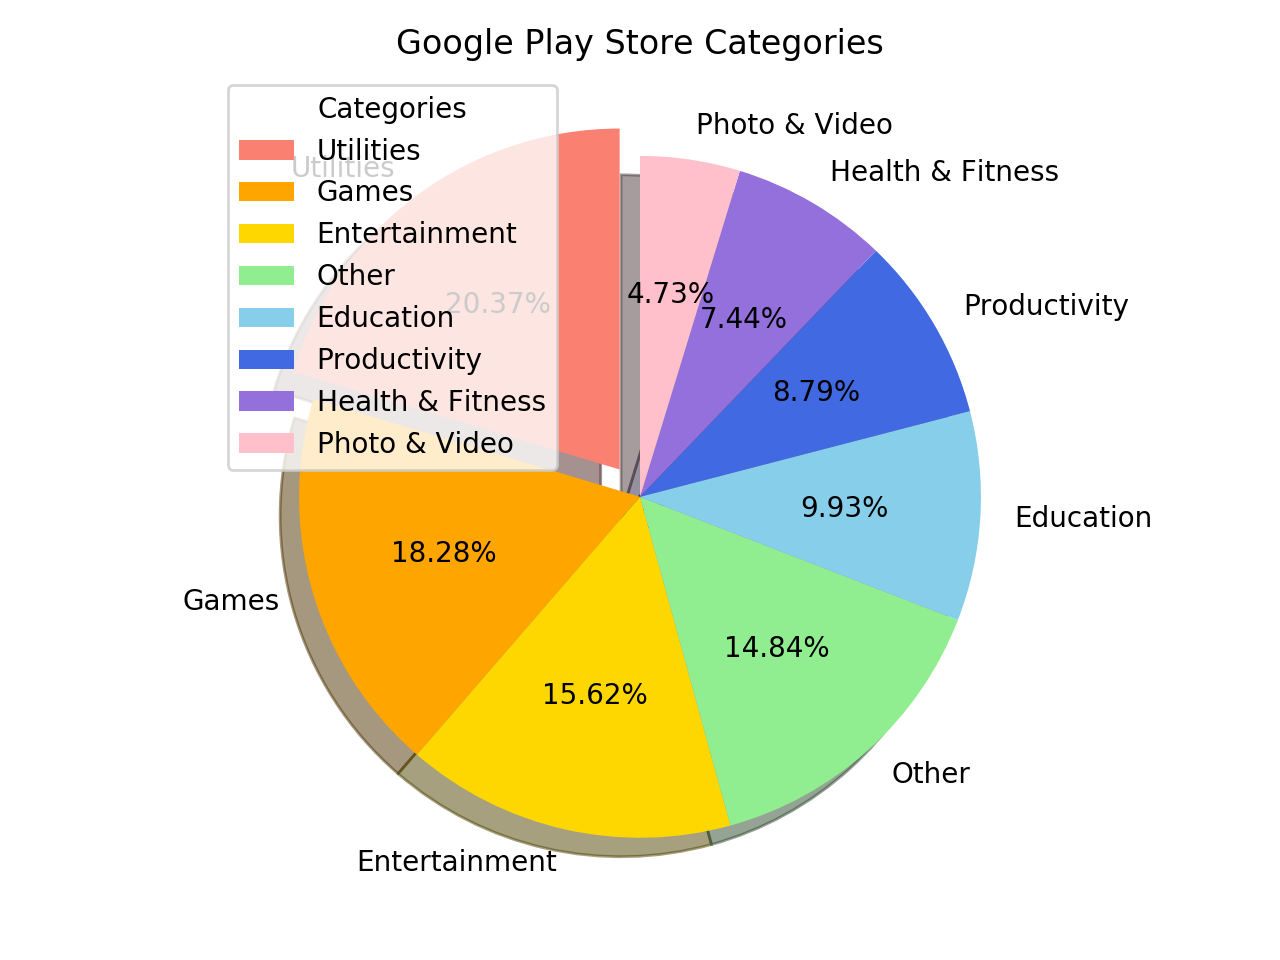

/Users/YoYoYe/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [141]:
fig1=plt.figure(1)
labels = google_cat.index
colors = ["salmon","orange","gold","lightgreen","skyblue","royalblue","mediumpurple","pink"]
explodes=[0.1,0,0,0,0,0,0,0]
plt.pie(google_cat["App"],colors=colors,labels=labels,autopct="%.2f%%",startangle=90,explode=explodes,shadow=True)
plt.axes().set_aspect("equal")
plt.title("Google Play Store Categories")
plt.legend(title="Categories",loc="best")
plt.tight_layout()

In [142]:
plt.close(fig1)

<IPython.core.display.Javascript object>


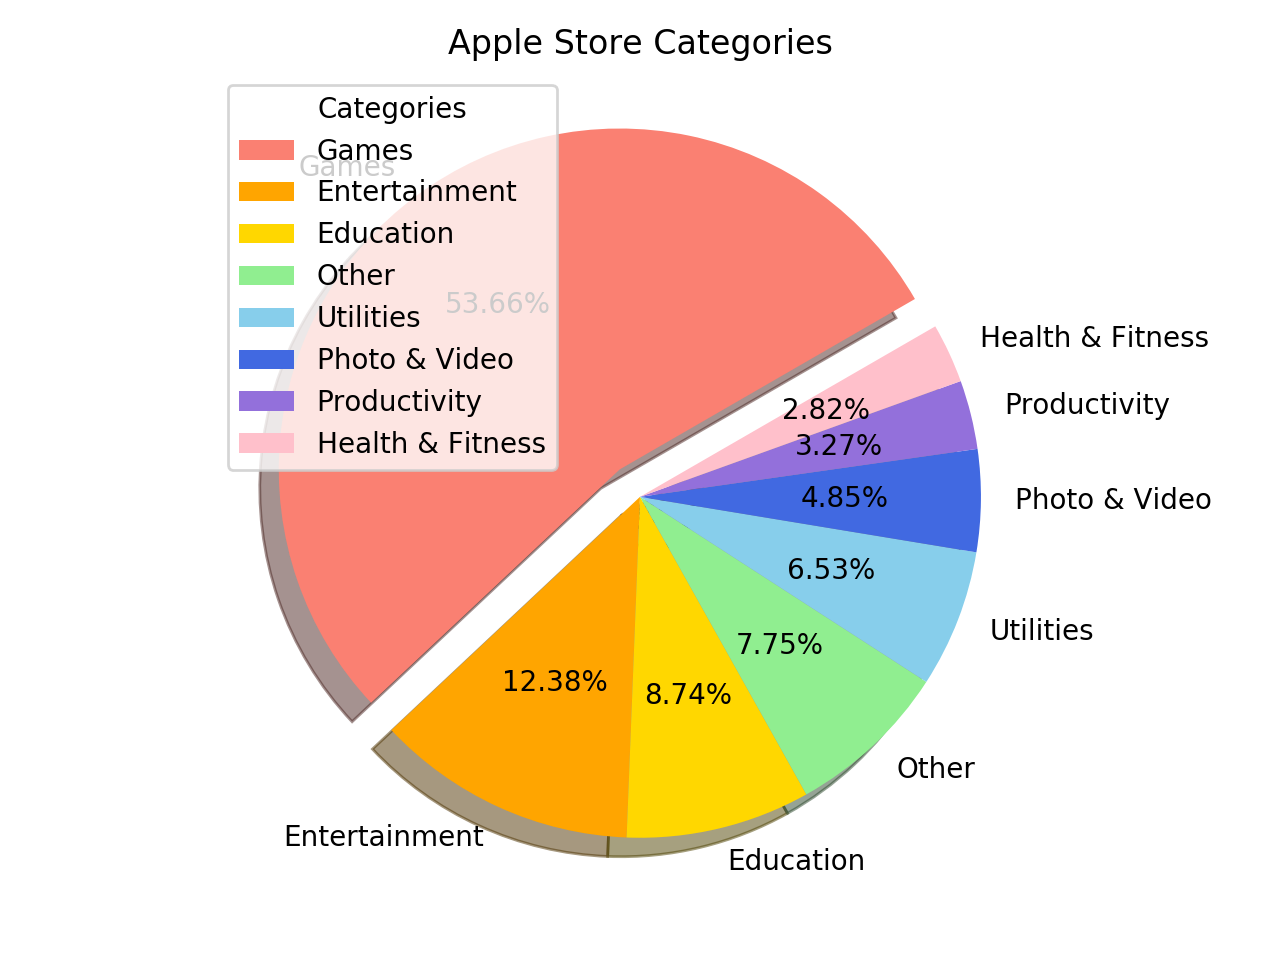

/Users/YoYoYe/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [145]:
fig2=plt.figure(2)
labels = apple_cat.index
colors = ["salmon","orange","gold","lightgreen","skyblue","royalblue","mediumpurple","pink"]
explodes=[0.1,0,0,0,0,0,0,0]
apple_pie=plt.pie(apple_cat["App"],colors=colors,labels=labels,autopct="%.2f%%",startangle=30,explode=explodes,shadow=True)
plt.axes().set_aspect("equal")
plt.title("Apple Store Categories")
plt.legend(title="Categories",loc="best")
plt.tight_layout()

In [ ]:
plt.close(fig2)